<a href="https://colab.research.google.com/github/sindhutej-6/dl_programs/blob/main/CNN_for_Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the Fashion MNIST dataset. This dataset contains 28x28 grayscale images
# of 10 different fashion items (e.g., t-shirt, trousers, etc.).
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# The images are 28x28 pixels. For a CNN, we need to add a channel dimension.
# For grayscale, this is a single channel. The shape becomes (num_samples, 28, 28, 1).
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [ ]:
# Define the 10 class names for the Fashion MNIST dataset.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# The labels are already integers (0-9), so we don't need one-hot encoding
# if we use 'sparse_categorical_crossentropy' as our loss function.
print(f"  Training images shape: {train_images.shape}")
print(f"  Test images shape: {test_images.shape}")
print(f"  Number of classes: {len(np.unique(train_labels))}")

  Training images shape: (60000, 28, 28, 1)
  Test images shape: (10000, 28, 28, 1)
  Number of classes: 10


In [ ]:
model = Sequential([
    # First Conv2D and MaxPooling2D layers.
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
           kernel_regularizer=regularizers.l2(0.001)), # L2 regularization
    MaxPooling2D((2, 2)),

    # Second set of Conv2D and MaxPooling2D layers.
    Conv2D(64, (3, 3), activation='relu',
           kernel_regularizer=regularizers.l2(0.001)), # L2 regularization
    MaxPooling2D((2, 2)),

    # Third set of Conv2D and MaxPooling2D layers.
    Conv2D(128, (3, 3), activation='relu',
           kernel_regularizer=regularizers.l2(0.001)), # L2 regularization
    MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps to a 1D vector.
    Flatten(),

    # A standard dense layer to process the features.
    Dense(128, activation='relu'),

    # Dropout layer to randomly "drop out" 50% of neurons during training.
    # This helps prevent overfitting by forcing the network to learn more robust features.
    Dropout(0.5),

    # The output layer with 10 neurons and 'softmax' activation for 10 classes.
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(train_images, train_labels,
                    epochs = epochs,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.6306 - loss: 1.1266 - val_accuracy: 0.8123 - val_loss: 0.6123
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.8111 - loss: 0.6218 - val_accuracy: 0.8357 - val_loss: 0.5215
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8394 - loss: 0.5379 - val_accuracy: 0.8523 - val_loss: 0.4856
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.8484 - loss: 0.5048 - val_accuracy: 0.8590 - val_loss: 0.4682
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.8605 - loss: 0.4736 - val_accuracy: 0.8650 - val_loss: 0.4470
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.8681 - loss: 0.4514 - val_accuracy: 0.8720 - val_loss: 0.4253
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.8729 - loss: 0.4405 - val_accuracy: 0.8747 - val_loss: 0.4166
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.8828 - loss: 0.4142 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.8771 - loss: 0.4154

Final Test Accuracy: 0.8771
Final Test Loss: 0.4154


In [ ]:
# Get the final training accuracy from the history object.
final_training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Final Training Accuracy: 0.8881
Final Test Accuracy: 0.8771


In [ ]:
# Plotting the training and validation accuracy and loss over time.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

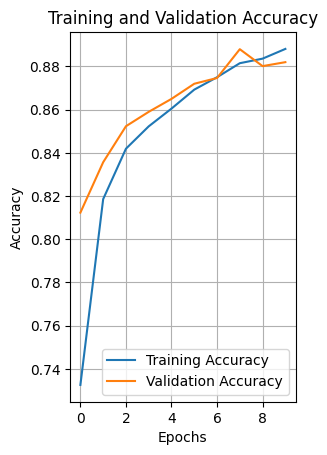

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)